In [1]:
# Imports das libs
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


Using TensorFlow backend.


In [7]:
# Obtendo dataset Minist
# Ja no Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dando uma olhada
#Quantas imagens de treino?
print(len(x_train))
#Quantas imagens de teste?
print(len(x_test))
# Qual o formato de uma imagem?
print(x_train[0].shape)
# Como sao os dados de uma imagem?
print(x_train[0])

60000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

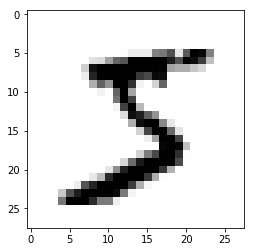

In [8]:
# Numtendi nada!
# Bora ver com matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
# Transformando a imagem 2d em um vetor 28*28 = 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train[0])

#Normalizando para valores entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train[0])

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
# Vamos ajustar o formato da saida
num_classes = 10

# O dataset tem como saida os labels
print(y_train[0])
# Convertendo para um vetor de saida com 10 dimensoes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [66]:
# Criando o modelo Sequential

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                23550     
_________________________________________________________________
dropout_22 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_23 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [62]:
# Treina com os parte dos dados
batch_size = 128
epochs = 10
#epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.2809 - acc: 0.9116 - val_loss: 0.1312 - val_acc: 0.9604
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.1342 - acc: 0.9612 - val_loss: 0.0963 - val_acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.1179 - acc: 0.9669 - val_loss: 0.1003 - val_acc: 0.9720
Epoch 4/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.1105 - acc: 0.9715 - val_loss: 0.1019 - val_acc: 0.9745
Epoch 5/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.1001 - acc: 0.9739 - val_loss: 0.0865 - val_acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.1054 - acc: 0.9752 - val_loss: 0.0997 - val_acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0974 - acc: 0.9774 - val_loss: 0.

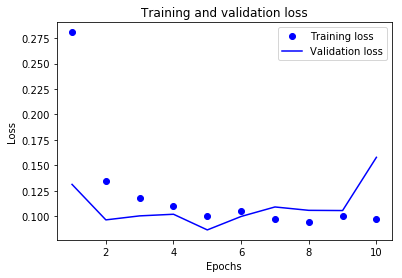

In [63]:
#Vamos ver como foi o treino?
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, epochs + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

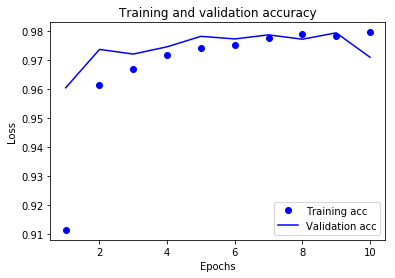

In [64]:
#Como a acuracia evoluiu?
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
# Testa
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1578602029005575
Test accuracy: 0.9709


In [17]:
# Testando uma entrada qualquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,784))))
print(model.predict_classes(x_train[10].reshape((1,784))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[4.2208517e-09 2.4792873e-06 9.1897855e-06 9.9964428e-01 1.4683323e-08
  2.5722283e-04 1.0546931e-12 2.7714700e-07 8.8912939e-06 7.7611883e-05]]
[3]


In [51]:
# Vendo alguns reports
# Usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Classificando toda base de teste
y_pred = model.predict_classes(x_test)
# voltando pro formato de classes
import numpy as np
y_test_c = np.argmax(y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))

Confusion Matrix
[[ 965    0    1    1    0    3    4    4    2    0]
 [   0 1116    4    3    0    1    3    1    7    0]
 [   7    5  979    8    6    1    2    8   16    0]
 [   0    1   14  957    0   22    0    7    5    4]
 [   1    4    5    0  925    0    8    3    6   30]
 [   6    1    1   19    3  841    7    2    7    5]
 [  15    4    2    0    7   12  914    0    4    0]
 [   2    9   21    4    5    0    0  975    1   11]
 [   6    6    5    8    4   12    6    5  917    5]
 [   6    6    0    9   22   14    1    4    3  944]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.94      0.94       892
           6       0.97      0.95      0.96       9

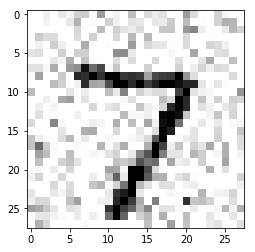

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Test loss: 0.9072277143001556
Test accuracy: 0.7056


In [14]:
#introduzindo ruido

#Lendo novamente
(xtr,ytr ), (x_te,y_te) = mnist.load_data()
x_te = x_te.reshape(10000, 784)


#Normalizando para valores entre 0 e 1
x_te = x_te.astype('float32')
x_te /= 255

#ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (10000, 784))
x_te = x_te + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(10000, 28,28)[0], cmap=plt.cm.binary)
plt.show()

print(y_test[0])
# Testa
score = model.evaluate(x_te, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])